In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage, dendrogram


from sklearn.cluster import AgglomerativeClustering


In [2]:
dataset_path = 'tarvel+review+ratings/google_review_ratings.csv'  
data = pd.read_csv(dataset_path)

In [3]:
data

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
1,User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
2,User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
3,User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
4,User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,...,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56,NaN
5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,...,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09,NaN
5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,...,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11,NaN
5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,...,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12,NaN


In [4]:
# Korak 2: Pregled podataka
data.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

In [6]:
data.shape

(5456, 26)

In [7]:
data.columns

Index(['User', 'Category 1', 'Category 2', 'Category 3', 'Category 4',
       'Category 5', 'Category 6', 'Category 7', 'Category 8', 'Category 9',
       'Category 10', 'Category 11', 'Category 12', 'Category 13',
       'Category 14', 'Category 15', 'Category 16', 'Category 17',
       'Category 18', 'Category 19', 'Category 20', 'Category 21',
       'Category 22', 'Category 23', 'Category 24', 'Unnamed: 25'],
      dtype='object')

In [8]:
# Spisak kolona sa ocenama (kolone 1 do 25)
rating_columns = data.columns[1:]

# Konvertovanje svih kolona sa ocenama u numeričke vrednosti (float)
data[rating_columns] = data[rating_columns].apply(pd.to_numeric, errors='coerce')

print(data[rating_columns].dtypes)

Category 1     float64
Category 2     float64
Category 3     float64
Category 4     float64
Category 5     float64
Category 6     float64
Category 7     float64
Category 8     float64
Category 9     float64
Category 10    float64
Category 11    float64
Category 12    float64
Category 13    float64
Category 14    float64
Category 15    float64
Category 16    float64
Category 17    float64
Category 18    float64
Category 19    float64
Category 20    float64
Category 21    float64
Category 22    float64
Category 23    float64
Category 24    float64
Unnamed: 25    float64
dtype: object


In [9]:
#provera da li je kolona "Unnamed: 25" zaista nepotrebna i ne sadrži važne podatke
data['Unnamed: 25'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Unnamed: 25, dtype: float64

In [10]:
#Pregled jedinstvenih vrednosti: 
data['Unnamed: 25'].unique()

array([ nan, 1.04, 2.58])

In [11]:
#Statistička analiza: da bismo videli raspodelu vrednosti
data['Unnamed: 25'].describe()

count    2.000000
mean     1.810000
std      1.088944
min      1.040000
25%      1.425000
50%      1.810000
75%      2.195000
max      2.580000
Name: Unnamed: 25, dtype: float64

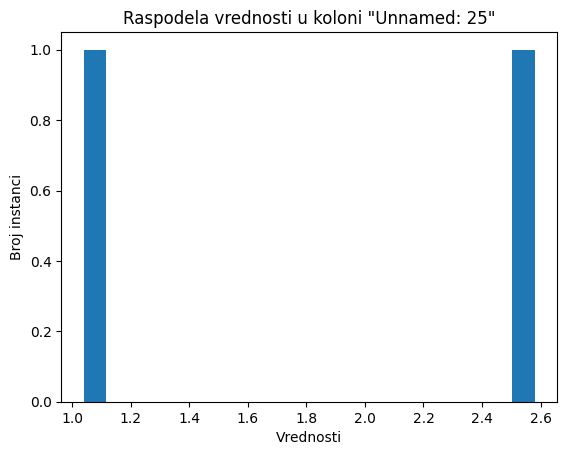

In [12]:
#Vizualizacija podataka: 
plt.hist(data['Unnamed: 25'], bins=20)
plt.xlabel('Vrednosti')
plt.ylabel('Broj instanci')
plt.title('Raspodela vrednosti u koloni "Unnamed: 25"')
plt.show()

In [13]:
#Korelacija sa drugim kolonama: da li postoji neka značajna korelacija između kolone "Unnamed: 25" i drugih kolona u dataset-u
#Ako nema jakih korelacija, to može ukazivati na nepotrebnost te kolone

# Radimo bez prve kolone 'User'
data = data.drop('User', axis=1) #dropujem Usera jer su sve vrednosti jedinstvene 
data = data.drop('Unnamed: 25', axis = 1) #imamo samo 2 instance kojima nije NaN vrednost u ovoj koloni
#correlations = data.corrwith(data['Unnamed: 25'])
#print(correlations)

In [14]:
#preimenovanje kolona
new_column_names = {
    'Category 1': 'AverageRatingsChurches',
    'Category 2': 'AverageRatingsResorts',
    'Category 3': 'AverageRatingsBeaches',
    'Category 4': 'AverageRatingsParks',
    'Category 5': 'AverageRatingsTheatres',
    'Category 6': 'AverageRatingsMuseums',
    'Category 7': 'AverageRatingsMalls',
    'Category 8': 'AverageRatingsZoo',
    'Category 9': 'AverageRatingsRestaurants',
    'Category 10': 'AverageRatingsPubsBars',
    'Category 11': 'AverageRatingsLocalServices',
    'Category 12': 'AverageRatingsBurgerPizzaShops',
    'Category 13': 'AverageRatingsHotelsLodgings',
    'Category 14': 'AverageRatingsJuiceBars',
    'Category 15': 'AverageRatingsArtGalleries',
    'Category 16': 'AverageRatingsDanceClubs',
    'Category 17': 'AverageRatingsSwimmingPools',
    'Category 18': 'AverageRatingsGyms',
    'Category 19': 'AverageRatingsBakeries',
    'Category 20': 'AverageRatingsBeautySpas',
    'Category 21': 'AverageRatingsCafes',
    'Category 22': 'AverageRatingsViewPoints',
    'Category 23': 'AverageRatingsMonuments',
    'Category 24': 'AverageRatingsGardens'
}

data.rename(columns=new_column_names, inplace=True)

print(data.columns)

Index(['AverageRatingsChurches', 'AverageRatingsResorts',
       'AverageRatingsBeaches', 'AverageRatingsParks',
       'AverageRatingsTheatres', 'AverageRatingsMuseums',
       'AverageRatingsMalls', 'AverageRatingsZoo', 'AverageRatingsRestaurants',
       'AverageRatingsPubsBars', 'AverageRatingsLocalServices',
       'AverageRatingsBurgerPizzaShops', 'AverageRatingsHotelsLodgings',
       'AverageRatingsJuiceBars', 'AverageRatingsArtGalleries',
       'AverageRatingsDanceClubs', 'AverageRatingsSwimmingPools',
       'AverageRatingsGyms', 'AverageRatingsBakeries',
       'AverageRatingsBeautySpas', 'AverageRatingsCafes',
       'AverageRatingsViewPoints', 'AverageRatingsMonuments',
       'AverageRatingsGardens'],
      dtype='object')


In [15]:
data

,AverageRatingsChurches,AverageRatingsResorts,AverageRatingsBeaches,AverageRatingsParks,AverageRatingsTheatres,AverageRatingsMuseums,AverageRatingsMalls,AverageRatingsZoo,AverageRatingsRestaurants,AverageRatingsPubsBars,...,AverageRatingsArtGalleries,AverageRatingsDanceClubs,AverageRatingsSwimmingPools,AverageRatingsGyms,AverageRatingsBakeries,AverageRatingsBeautySpas,AverageRatingsCafes,AverageRatingsViewPoints,AverageRatingsMonuments,AverageRatingsGardens
0,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
2,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
3,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
4,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,...,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
5452,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,...,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
5453,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,...,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11
5454,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,...,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12


In [16]:
# Statističke informacije o numeričkim kolonama
data.describe()

,AverageRatingsChurches,AverageRatingsResorts,AverageRatingsBeaches,AverageRatingsParks,AverageRatingsTheatres,AverageRatingsMuseums,AverageRatingsMalls,AverageRatingsZoo,AverageRatingsRestaurants,AverageRatingsPubsBars,...,AverageRatingsArtGalleries,AverageRatingsDanceClubs,AverageRatingsSwimmingPools,AverageRatingsGyms,AverageRatingsBakeries,AverageRatingsBeautySpas,AverageRatingsCafes,AverageRatingsViewPoints,AverageRatingsMonuments,AverageRatingsGardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,...,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,...,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


    Srednje vrednosti ("mean") za svaku kategoriju atrakcija (npr. crkve, plaže, parkovi itd. ) su različite, što ukazuje na raznolikost ocena za različite vrste atrakcija.

    Standardna devijacija ("std") pokazuje meru rasipanja ocena. Ako je standardna devijacija visoka, to znači da su ocene široko rasprostranjene oko srednje vrednosti.

    Minimum i maksimum vrednosti ("min" i "max") pokazuju opseg ocena za svaku kategoriju atrakcija.

    "25%", "50%" i "75%" kvantili vam daju informacije o percentilima raspodele ocena. Na primer, 25% kvantil znači da je 25% ocena ispod te vrednosti.

In [17]:
#provera NaN vrednosti
nan_check = data.isna().sum()
print(nan_check)

AverageRatingsChurches            0
AverageRatingsResorts             0
AverageRatingsBeaches             0
AverageRatingsParks               0
AverageRatingsTheatres            0
AverageRatingsMuseums             0
AverageRatingsMalls               0
AverageRatingsZoo                 0
AverageRatingsRestaurants         0
AverageRatingsPubsBars            0
AverageRatingsLocalServices       1
AverageRatingsBurgerPizzaShops    1
AverageRatingsHotelsLodgings      0
AverageRatingsJuiceBars           0
AverageRatingsArtGalleries        0
AverageRatingsDanceClubs          0
AverageRatingsSwimmingPools       0
AverageRatingsGyms                0
AverageRatingsBakeries            0
AverageRatingsBeautySpas          0
AverageRatingsCafes               0
AverageRatingsViewPoints          0
AverageRatingsMonuments           0
AverageRatingsGardens             1
dtype: int64


In [18]:
# Zamena NaN vrednosti prosekom po koloni
data = data.fillna(data.mean())

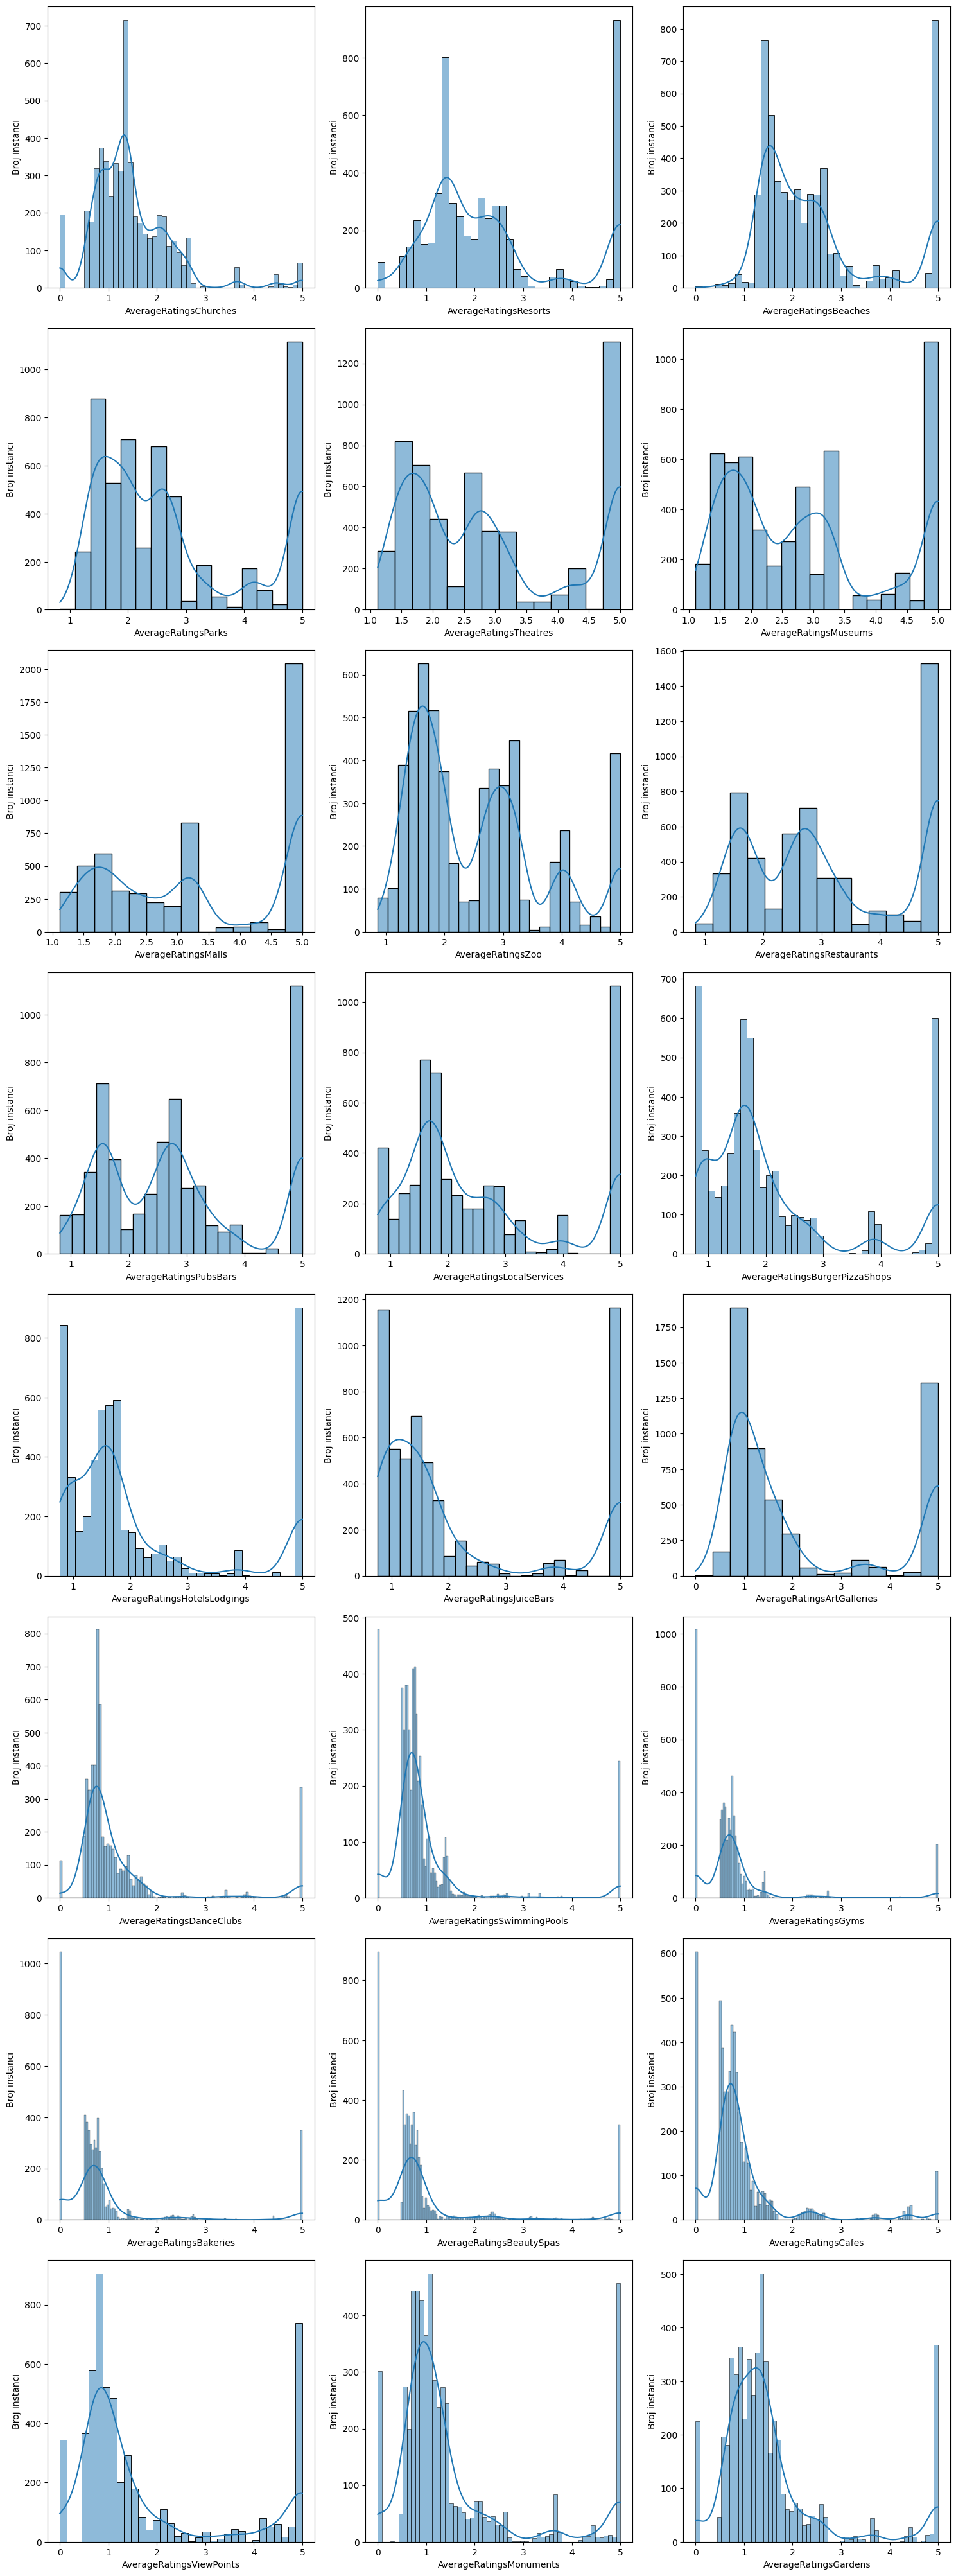

In [19]:
#numeričke kolone za vizualizaciju
numeric_columns = data.select_dtypes(include=['float64']).columns

# Podesite broj kolona i redova za prikaz histograma
num_rows = len(numeric_columns)
num_cols = 3  # Promenite na broj kolona koji želite

# Postavite veličinu figure
plt.figure(figsize=(15, 5 * num_rows))

# Iterirajte kroz numeričke kolone i nacrtajte histogram za svaku od njih
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(data[column], kde=True)
    plt.xlabel(column)
    plt.ylabel('Broj instanci')

plt.tight_layout()
plt.show()

    Normalna raspodela: Ako histogram podataka podseća na normalnu raspodelu (tzv. "zvonasta kriva") sa simetričnim špicem u sredini, to može ukazivati na to da su podaci pravilno raspoređeni i da nema većih odstupanja.

    Desno ili levo odstupanje: Ako histogram ima dugačak rep s desne strane (pozitivno odstupanje) ili s leve strane (negativno odstupanje), to može ukazivati na prisustvo ekstremnih vrednosti ili skewness (neproporcionalne raspodele) u podacima.

    Višekratni pikovi: Ako histogram ima više vrhova ili pikova, to može ukazivati na postojanje različitih grupa ili klastera u podacima.

    Izuzeci ili anomalije: Oštri vrhovi ili izdvojene šiljaste vrednosti koje se odvajaju od glavne mase podataka mogu biti izuzeci ili anomalije. Ovo može biti znak da su ovi podaci neobični i zahtevaju dodatnu pažnju prilikom analize.

    Gustina podataka: Gusta koncentracija podataka oko određenih vrednosti može ukazivati na to da se većina podataka nalazi u određenom opsegu vrednosti.

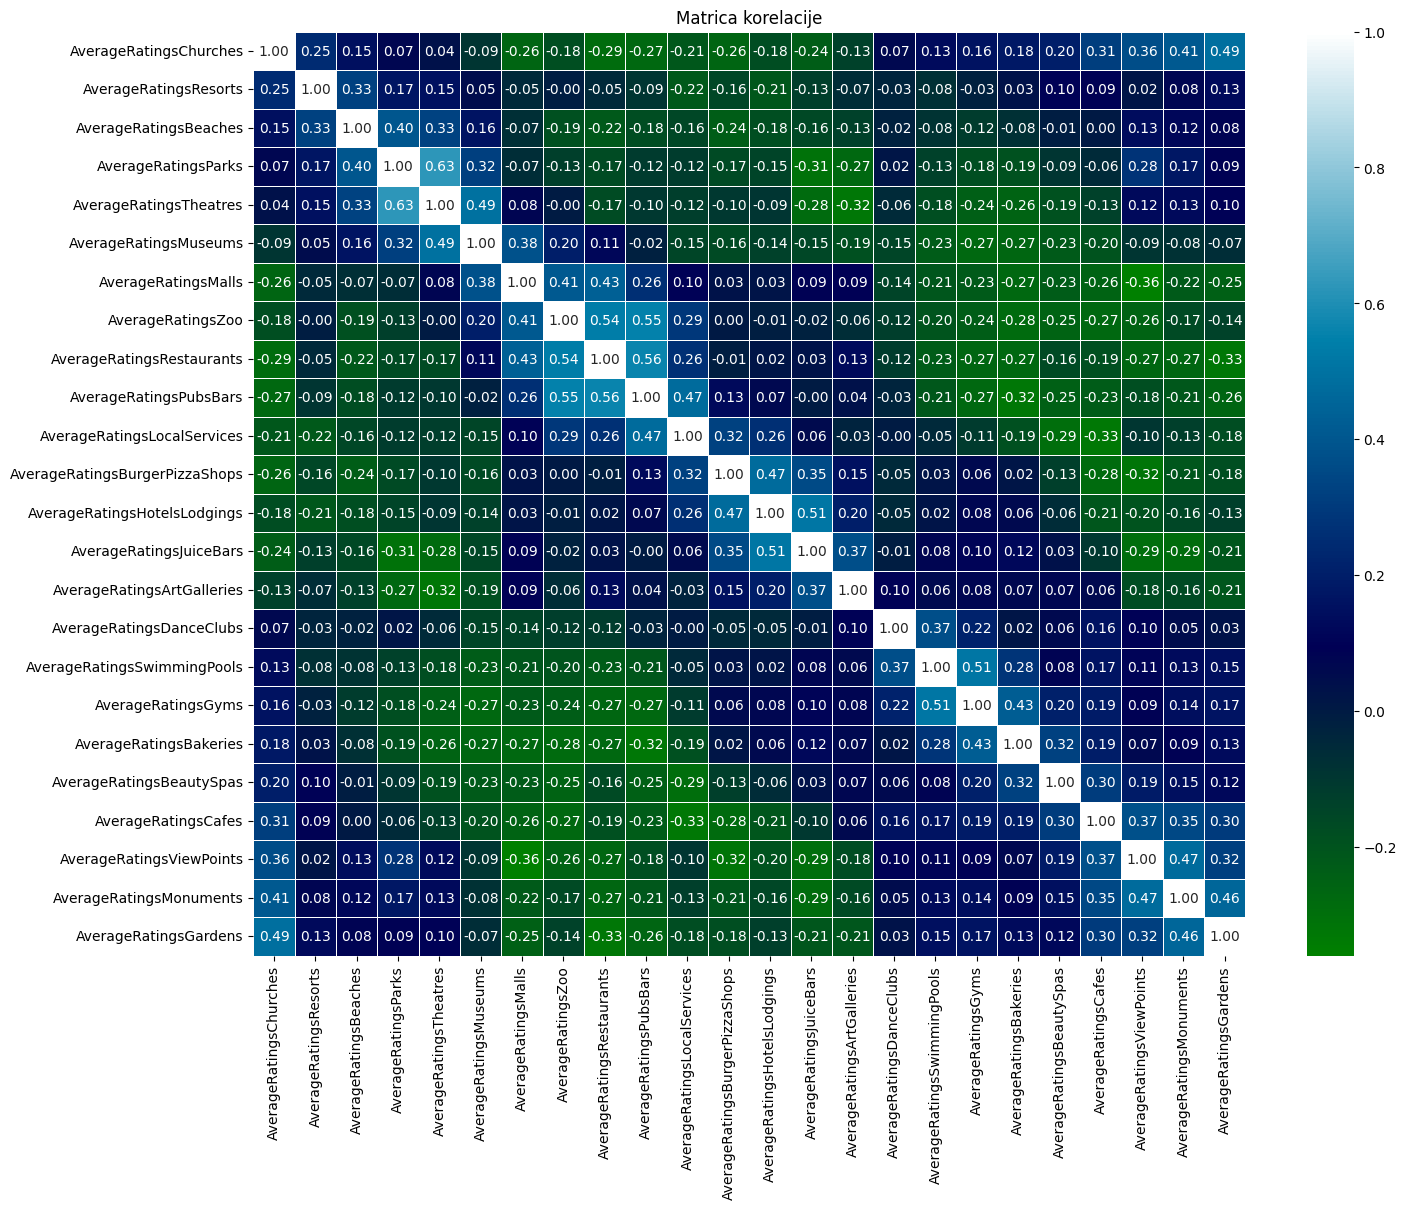

In [20]:
correlation_matrix = data.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='ocean', fmt=".2f", linewidths=.5)
plt.title('Matrica korelacije')
plt.show()

In [21]:
data

,AverageRatingsChurches,AverageRatingsResorts,AverageRatingsBeaches,AverageRatingsParks,AverageRatingsTheatres,AverageRatingsMuseums,AverageRatingsMalls,AverageRatingsZoo,AverageRatingsRestaurants,AverageRatingsPubsBars,...,AverageRatingsArtGalleries,AverageRatingsDanceClubs,AverageRatingsSwimmingPools,AverageRatingsGyms,AverageRatingsBakeries,AverageRatingsBeautySpas,AverageRatingsCafes,AverageRatingsViewPoints,AverageRatingsMonuments,AverageRatingsGardens
0,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
2,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
3,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
4,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,...,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
5452,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,...,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
5453,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,...,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11
5454,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,...,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12


In [22]:
# # Racunanje kvartilz za svaku numeričku kolonu
# Q1 = data[numeric_columns].quantile(0.25)
# Q3 = data[numeric_columns].quantile(0.75)

# # Računanje IQR za svaku numeričku kolonu
# IQR = Q3 - Q1

# # Definisanje donje i gornje granice za detekciju autlajera
# lower_limit = Q1 - 1.5 * IQR
# upper_limit = Q3 + 1.5 * IQR

# # Detekcija autlajera u svakoj koloni
# outliers = ((data[numeric_columns] < lower_limit) | (data[numeric_columns] > upper_limit)).sum()

# print(outliers)

In [23]:
# #numeric_columns = data_filled.select_dtypes(include=['float64', 'int64'])

# # Postavljamo veličinu grafikona prema potrebi
# plt.figure(figsize=(14, 8))

# #Crtamo box plot za svaku numeričku kolonu
# sns.boxplot(data=numeric_columns, orient="h")  # "orient" postavite na "h" za horizontalni prikaz

# # Dodajemo naslov i labelu na y-osu
# plt.title('Box Plotovi za Numeričke Kolone')
# plt.xlabel('Ocene')

# # Rotiramo labelu x-osu za bolju čitljivost
# plt.xticks(rotation=45)

# plt.show()

In [24]:
#Standardizacija
scaler = StandardScaler()

In [25]:
data.columns

Index(['AverageRatingsChurches', 'AverageRatingsResorts',
       'AverageRatingsBeaches', 'AverageRatingsParks',
       'AverageRatingsTheatres', 'AverageRatingsMuseums',
       'AverageRatingsMalls', 'AverageRatingsZoo', 'AverageRatingsRestaurants',
       'AverageRatingsPubsBars', 'AverageRatingsLocalServices',
       'AverageRatingsBurgerPizzaShops', 'AverageRatingsHotelsLodgings',
       'AverageRatingsJuiceBars', 'AverageRatingsArtGalleries',
       'AverageRatingsDanceClubs', 'AverageRatingsSwimmingPools',
       'AverageRatingsGyms', 'AverageRatingsBakeries',
       'AverageRatingsBeautySpas', 'AverageRatingsCafes',
       'AverageRatingsViewPoints', 'AverageRatingsMonuments',
       'AverageRatingsGardens'],
      dtype='object')

In [26]:
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [27]:
#PCA_1
pca1 = PCA(0.8) #zelim da zadrzim 80% varijanse

In [28]:
# Fitujemo pca na standardizovanim podacima
pca1.fit(data[numeric_columns])

PCA(n_components=0.8)

In [29]:
pca1.n_components_

13

In [30]:
# Instanciraj PCA model sa željenim brojem komponenti (npr. 2 za vizualizaciju)
#isprobamo za 2 komponente koliko varijanse je zadrzano
pca2 = PCA(n_components=2)

In [31]:
pca2.fit(data)

PCA(n_components=2)

In [32]:
pca2.explained_variance_ratio_  #cilj je bio da vizualizujemo podatke (cuva nam se mali udeo varijanse)

array([0.19659804, 0.14557708])

Dobijene vrednosti [0.20027765 0.14780102] predstavljaju "explained variance ratio" za svaku od dve komponente koje si izabrao. Ovo znači da prva komponenta objašnjava približno 20.03% ukupne varijacije u tvojim podacima, dok druga komponenta objašnjava približno 14.78% ukupne varijacije.

Kada koristiš PCA za smanjenje dimenzionalnosti, možeš koristiti ove vrednosti da proceniš koliko dobro komponente sačuvavaju informacije iz originalnih podataka. U ovom slučaju, 34.81% ukupne varijacije je sačuvano koristeći samo dve komponente. To znači da su ti podaci redukovani sa 25 atributa na 2 komponente, ali se još uvek zadržava znatan deo varijacije.

Odluka o broju komponenti koji želiš da zadržiš zavisi od tvojih specifičnih ciljeva analize i koliko varijacije želiš da sačuvaš. Možeš eksperimentisati sa različitim brojevima komponenti kako bi pronašao odgovarajući balans između smanjenja dimenzionalnosti i zadržavanja što više informacija.

In [33]:
pca2.components_ 

array([[ 0.28571703,  0.11109002,  0.13201492,  0.109556  ,  0.05071252,
        -0.08223691, -0.25907035, -0.26860737, -0.29766249, -0.2910518 ,
        -0.22729392, -0.17746166, -0.14599012, -0.14316486, -0.08826276,
         0.09350743,  0.15475488,  0.17556217,  0.18069643,  0.19306043,
         0.26223632,  0.27667804,  0.26900827,  0.26608461],
       [-0.04114428, -0.14696076, -0.23925331, -0.34047908, -0.376447  ,
        -0.33295538, -0.1267881 , -0.12464899, -0.05464895, -0.05363962,
         0.05144646,  0.21306557,  0.22775456,  0.29613879,  0.24714246,
         0.11206081,  0.24066114,  0.28525604,  0.2623532 ,  0.1498411 ,
         0.07774478, -0.08808061, -0.07539991, -0.04674014]])

In [34]:
# Transformišemo podatke 
data = pca2.transform(data)

In [36]:
data = pd.DataFrame(data, columns=['PCA1', 'PCA2'])

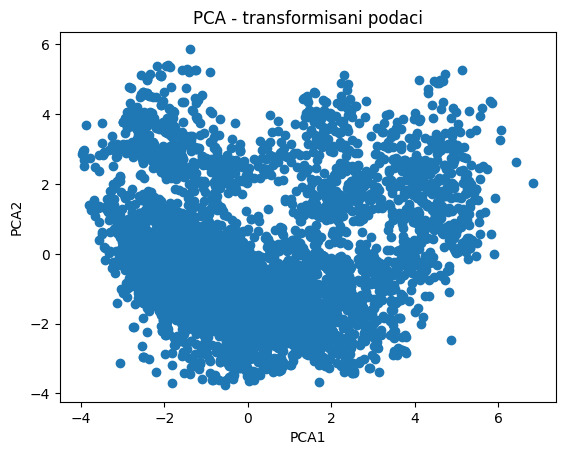

In [37]:
# Plotuj rezultate PCA
#PROVERITI OVO
plt.scatter(data['PCA1'], data['PCA2'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA - transformisani podaci')
plt.show()

In [38]:
# Inicijalizacija praznih listi za vrednosti metoda lakta i silhouette score
inertia_values = []
silhouette_scores = []

# Pokušajte različite brojeve klastera od 2 do n
n = 15

for k in range(2, n + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    
    # Dodajemo vrednost metoda lakta za trenutni broj klastera
    inertia_values.append(kmeans.inertia_)
    
    # Predviđanje klastera za svaku tačku i računanje silhouette score
    labels = kmeans.predict(data)
    silhouette_avg = silhouette_score(data, labels)
    silhouette_scores.append(silhouette_avg)

/home/oem/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/oem/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/oem/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/oem/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 

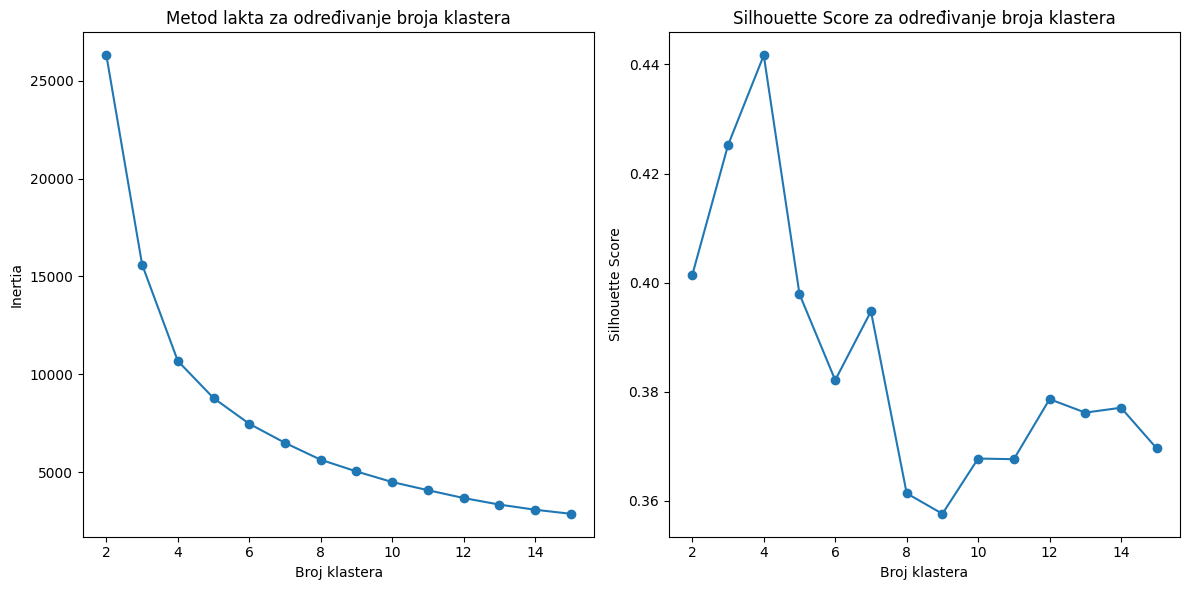

In [39]:
#metoda lakta
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, n + 1), inertia_values, marker='o')
plt.xlabel('Broj klastera')
plt.ylabel('Inertia')
plt.title('Metod lakta za određivanje broja klastera')

# Nacrtajte grafik silhouette score-a
plt.subplot(1, 2, 2)
plt.plot(range(2, n + 1), silhouette_scores, marker='o')
plt.xlabel('Broj klastera')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score za određivanje broja klastera')

plt.tight_layout()
plt.show()

In [40]:
#sa grafika vidimo da je lakat za 4 klastera, a i silueta skor je najbolji takodje u 4
#zato fitujemo KMeans za 4 klastera
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

/home/oem/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [41]:
klasteri = kmeans.labels_
np.unique(klasteri)

array([0, 1, 2, 3], dtype=int32)

In [42]:
data['PCA1']

0      -1.898439
1      -1.970760
2      -1.970208
3      -1.865969
4      -1.970208
          ...   
5451    3.608116
5452    3.450030
5453    3.925023
5454    3.678860
5455    3.898745
Name: PCA1, Length: 5456, dtype: float64

In [43]:
centroids = kmeans.cluster_centers_

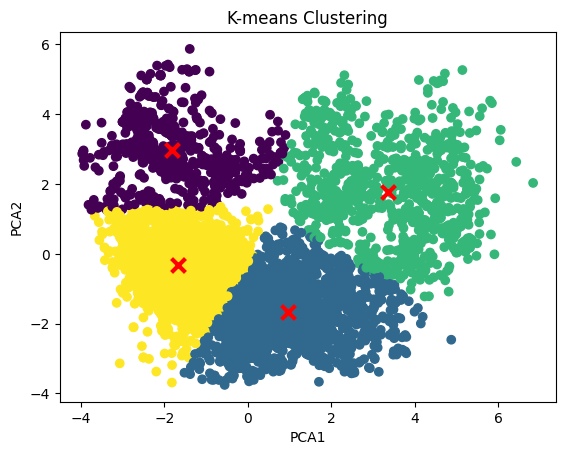

In [44]:
#PCA = Analiza glavnih komponenti
plt.scatter(data['PCA1'], data['PCA2'], c=klasteri, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, linewidths=3, color='r')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('K-means Clustering')
plt.show()

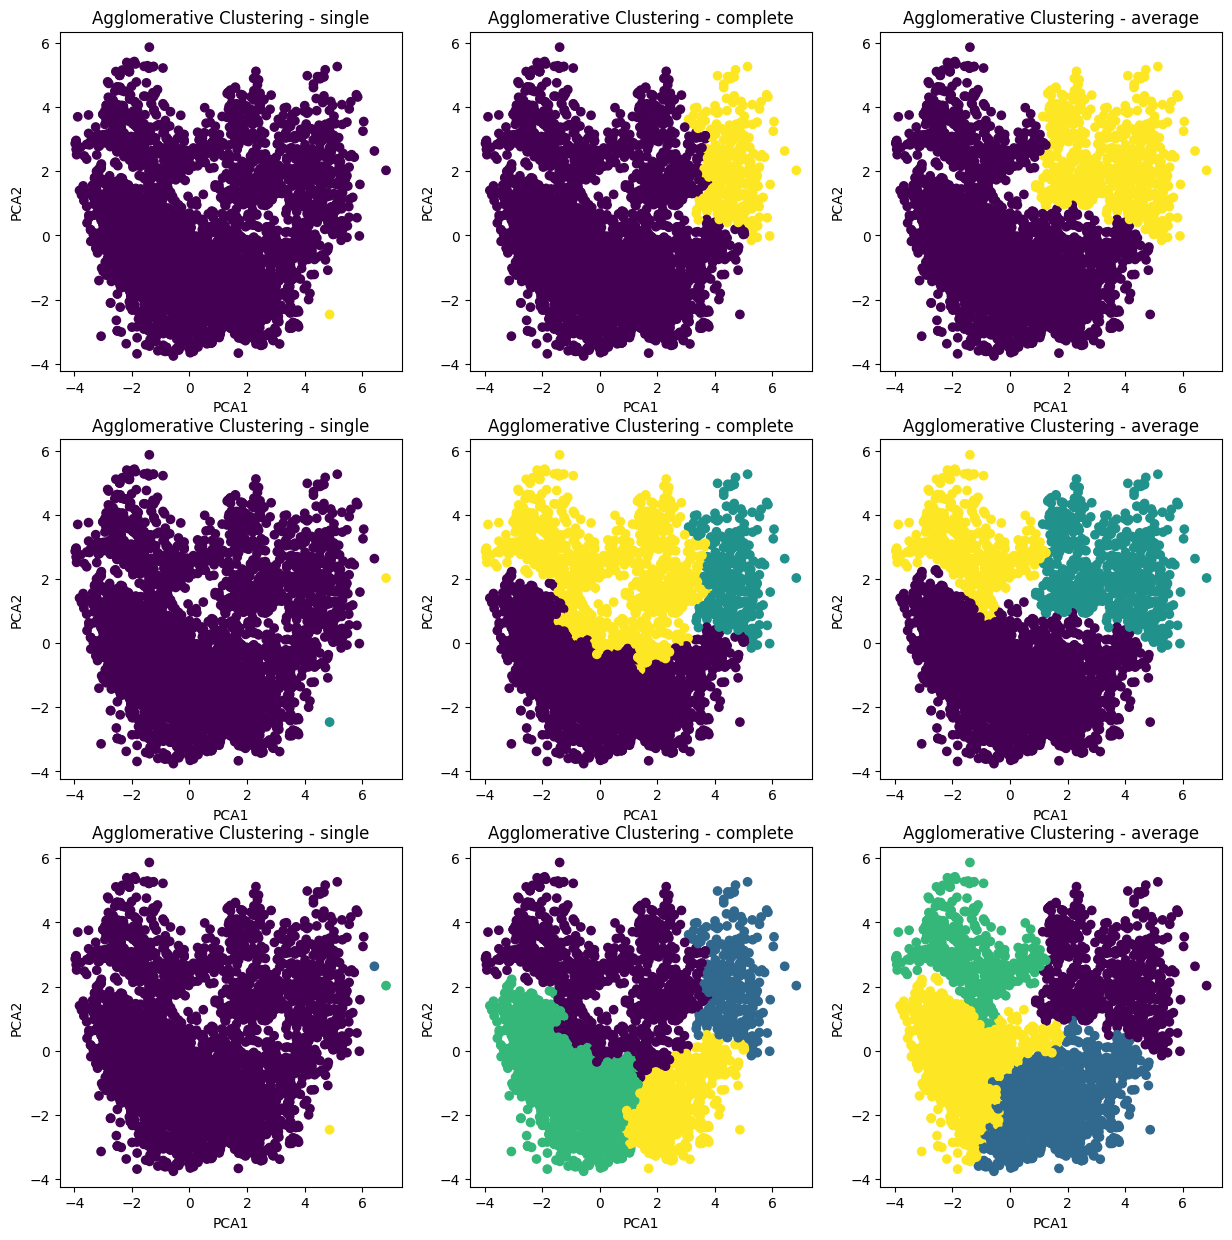

In [45]:

linkages = ['single', 'complete', 'average']
fig = plt.figure(figsize=(15,15))
ind = 1
for k in range(2,5):
    for link in linkages:
        model = AgglomerativeClustering(n_clusters=k, linkage=link)
        model.fit(data)
        klasteri = model.labels_
        
        fig.add_subplot(3, len(linkages), ind)
        ind += 1
        plt.scatter(data['PCA1'], data['PCA2'], c=klasteri, cmap='viridis')
        plt.xlabel('PCA1')
        plt.ylabel('PCA2')
        plt.title(f'Agglomerative Clustering - {link}')
plt.show()


In [46]:
#odlucili smo da cemo average vezu i k = 4
agg = AgglomerativeClustering(n_clusters=4, linkage='average')
agg.fit(data)

AgglomerativeClustering(linkage='average', n_clusters=4)

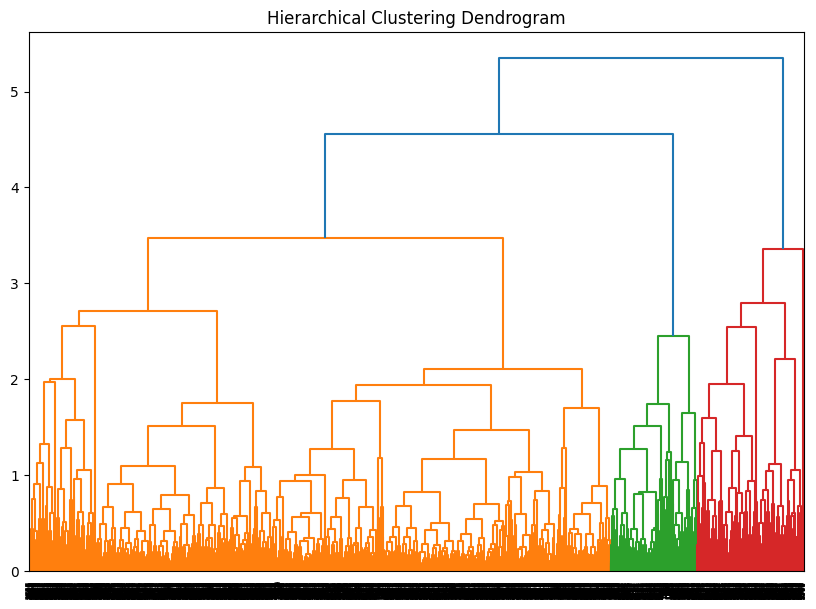

In [47]:
# Nacrtajte dendrogram za svaki klaster
# Kreiranje hijerarhijskog klastera
linked = linkage(data, method='average') #naci sta radi ward
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [48]:
kmeans_score = silhouette_score(data, kmeans.labels_)
kmeans_score

0.4416851520070687

In [49]:
agg_score = silhouette_score(data, agg.labels_)
agg_score

0.4207924626068117

In [50]:
#kad odaberemo 4 klastera i vizuelno izgledaju slicno
#uzmi u obzir ward metod 